<a href="https://colab.research.google.com/github/VladDrondoe/Supervised-learning-Classification-Project/blob/main/payment_delay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv('Reiffeissen_training_set.csv')
test=pd.read_excel('test_cursanti.xlsx')

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay
0,HI,33,area_code_415,no,no,0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,6,4.40,3,no
1,TN,80,area_code_415,yes,no,0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,3,1.94,1,yes
2,CT,37,area_code_408,no,no,0,134.9,98,22.93,248.4,130,21.11,236.2,113,10.63,14.7,2,3.97,3,no
3,TN,106,area_code_415,no,no,0,119.2,142,20.26,228.4,139,19.41,197.9,61,8.91,8.4,9,2.27,2,no
4,TX,123,area_code_408,no,no,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3000 non-null   object 
 1   account_length                 3000 non-null   int64  
 2   area_code                      3000 non-null   object 
 3   international_plan             3000 non-null   object 
 4   voice_mail_plan                3000 non-null   object 
 5   number_vmail_messages          3000 non-null   int64  
 6   total_day_minutes              3000 non-null   float64
 7   total_day_calls                3000 non-null   int64  
 8   total_day_charge               3000 non-null   float64
 9   total_eve_minutes              3000 non-null   float64
 10  total_eve_calls                3000 non-null   int64  
 11  total_eve_charge               3000 non-null   float64
 12  total_night_minutes            3000 non-null   f

In [ ]:
train['area_code'].value_counts()

,count
area_code,
area_code_415,1473
area_code_510,770
area_code_408,757


###EDA

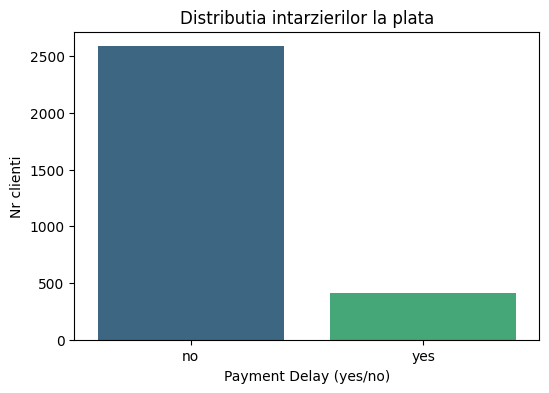

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='payment_delay', palette='viridis')
plt.title("Distributia intarzierilor la plata")
plt.xlabel("Payment Delay (yes/no)")
plt.ylabel("Nr clienti")
plt.show()

In [ ]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
account_length,3000.0,100.510000,39.485782,1.0,73.0000,100.00,127.0000,233.00
number_vmail_messages,3000.0,7.977333,13.730125,0.0,0.0000,0.00,18.0000,52.00
total_day_minutes,3000.0,180.456533,54.098371,0.0,143.7000,179.40,216.8000,346.80
total_day_calls,3000.0,100.228667,19.763769,0.0,87.0000,101.00,113.0000,165.00
total_day_charge,3000.0,30.678167,9.196706,0.0,24.4300,30.50,36.8600,58.96
total_eve_minutes,3000.0,200.034000,50.127406,22.3,165.8000,199.90,233.7000,363.70
total_eve_calls,3000.0,100.247333,19.761638,12.0,87.0000,101.00,113.0000,169.00
total_eve_charge,3000.0,17.003100,4.260769,1.9,14.0900,16.99,19.8600,30.91
total_night_minutes,3000.0,201.099633,50.863770,0.0,166.9750,201.60,235.2250,395.00
total_night_calls,3000.0,99.939667,19.669680,0.0,87.0000,100.00,113.0000,175.00


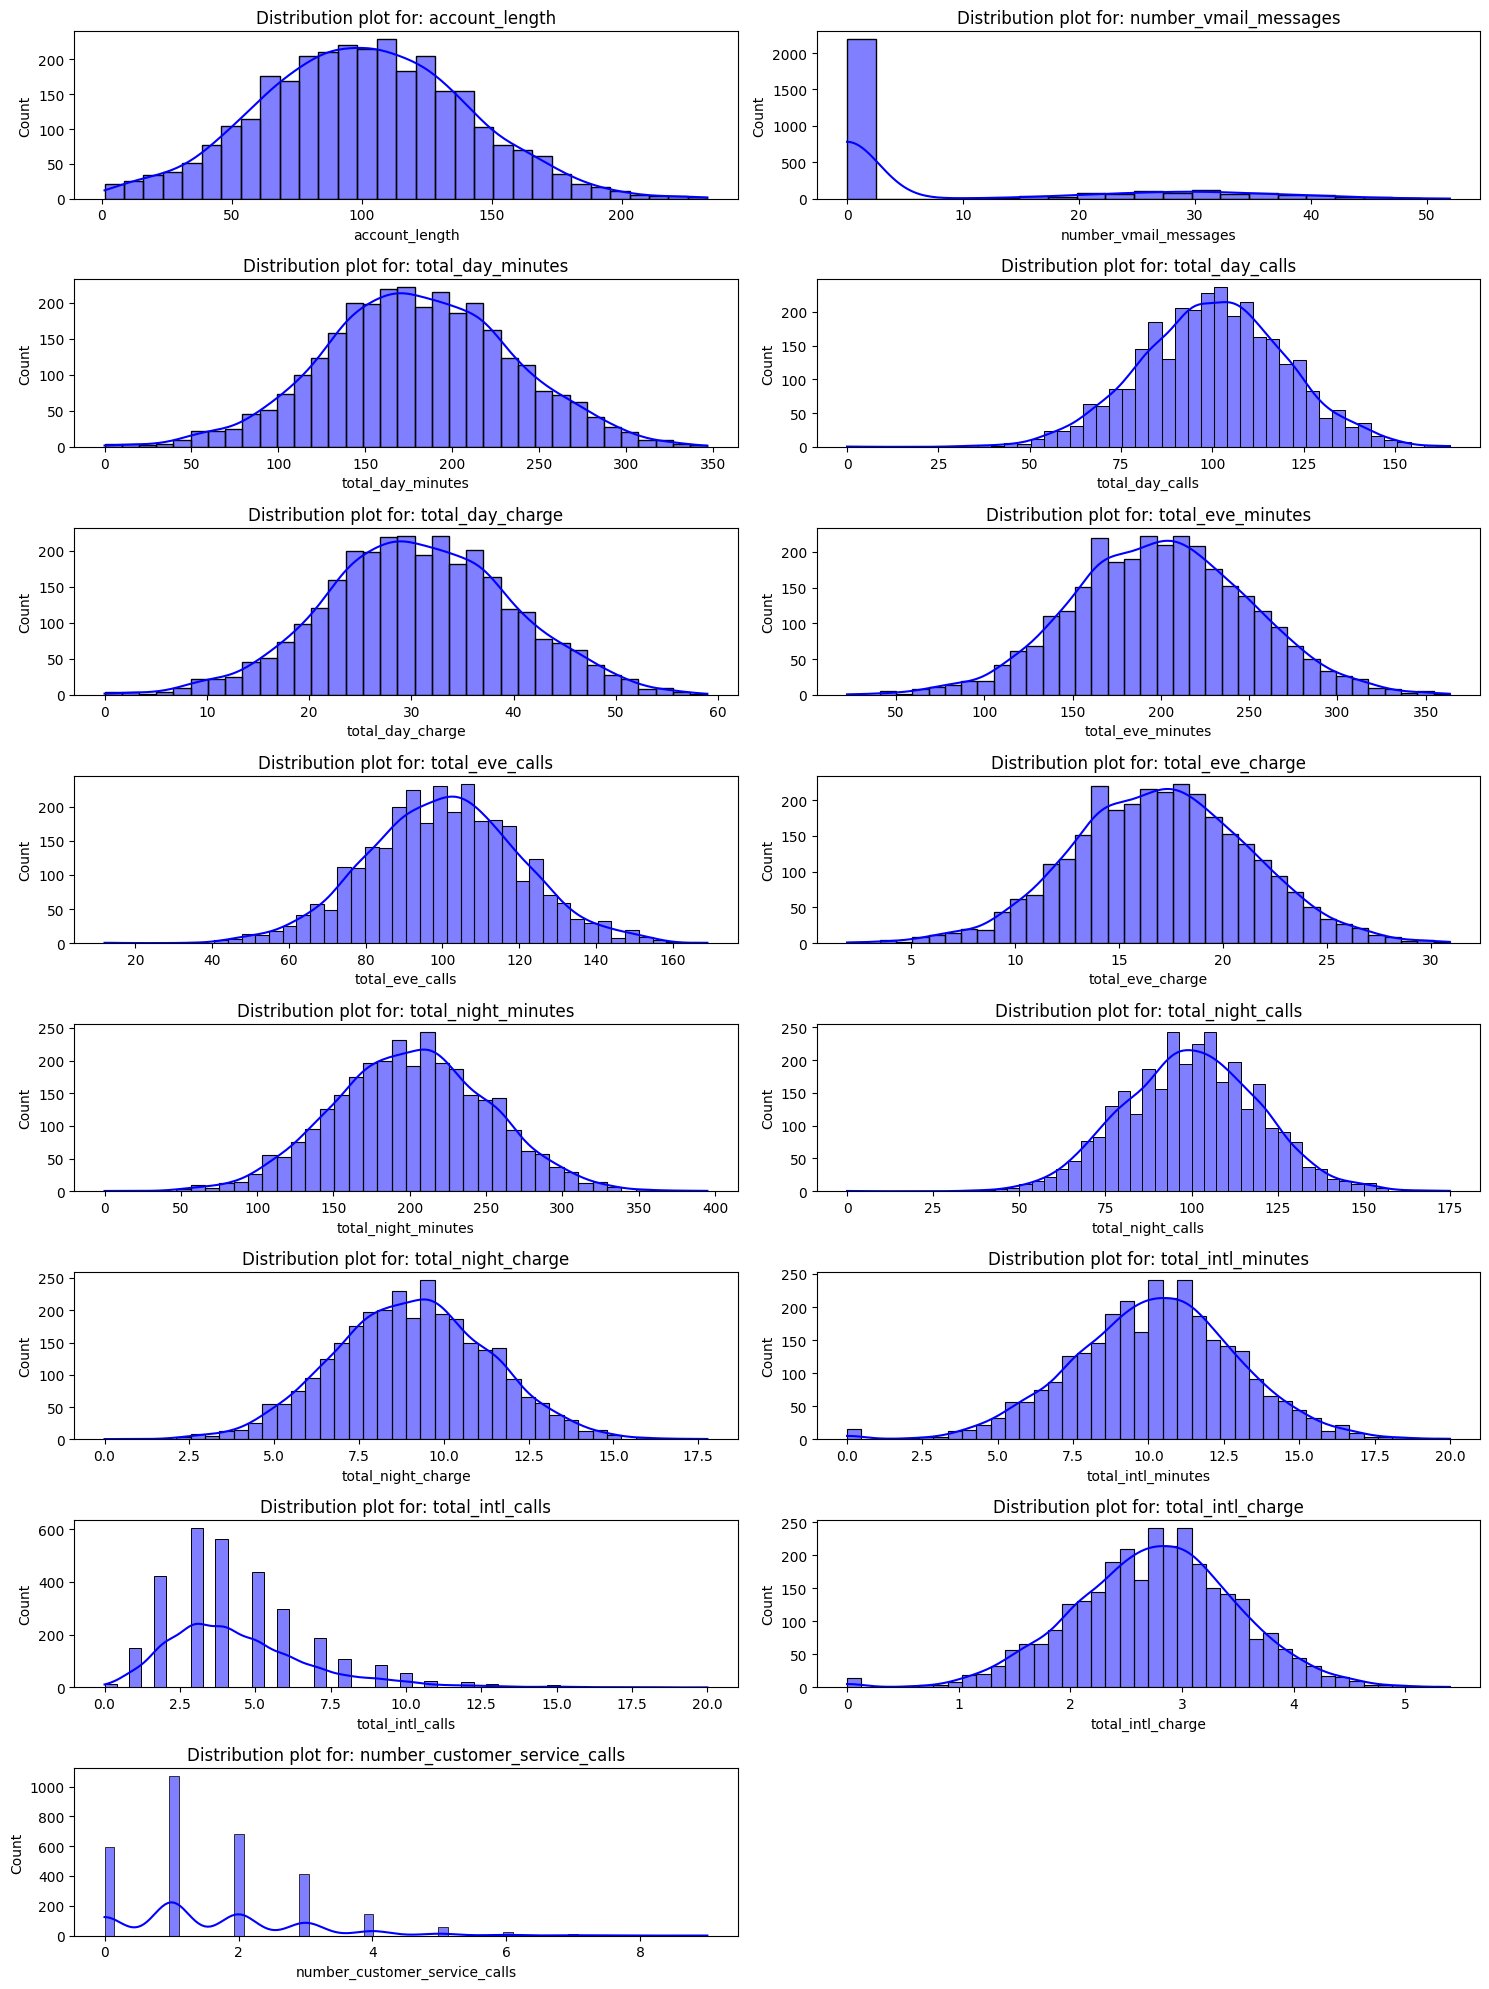

In [ ]:
numeric_cols = train.drop(['payment_delay'], axis=1).select_dtypes(include='number').columns

plt.figure(figsize=(15, 20))

for i, c in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i)
    sns.histplot(train[c], kde=True, color='blue')
    plt.title('Distribution plot for: ' + c)

plt.tight_layout()
plt.show()

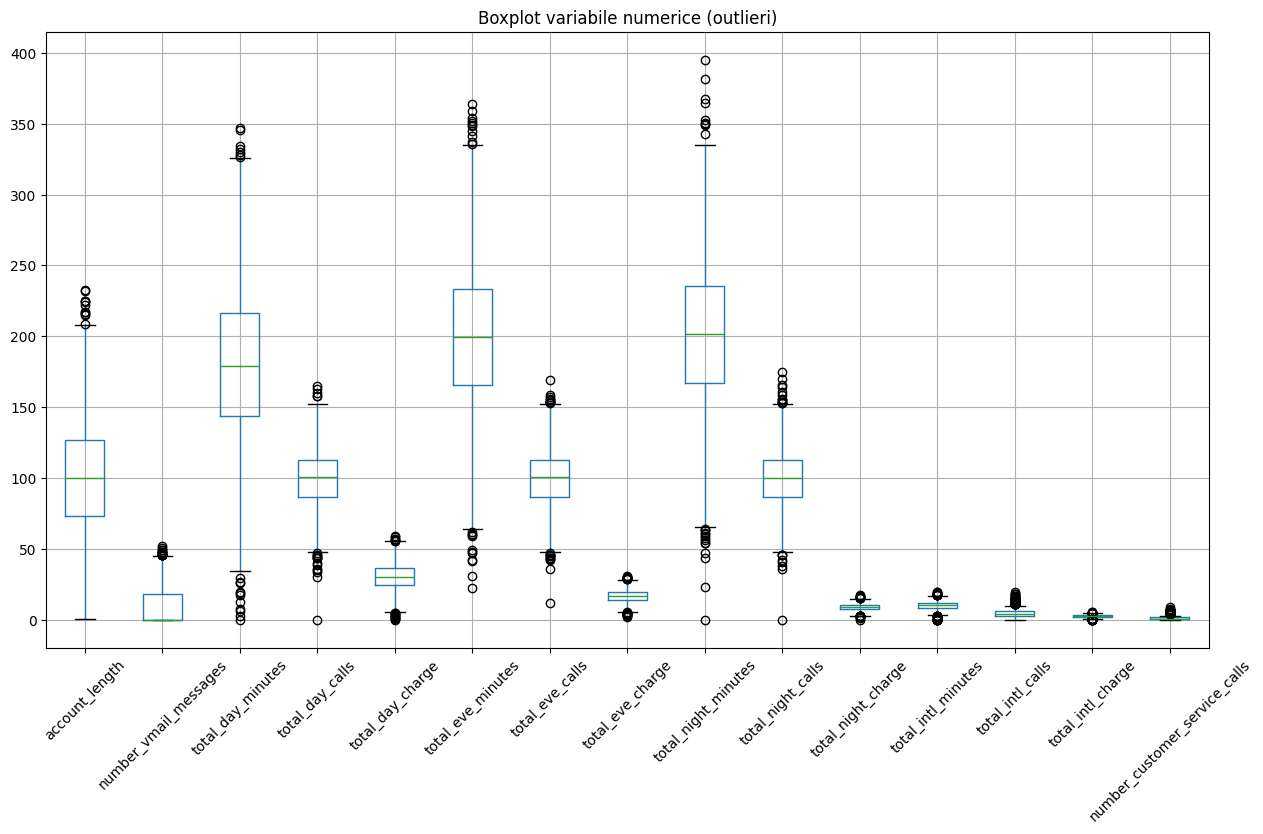

In [ ]:
plt.figure(figsize=(15, 8))
train.select_dtypes(include=['int64','float64']).boxplot()
plt.title("Boxplot variabile numerice (outlieri)")
plt.xticks(rotation=45)
plt.show()

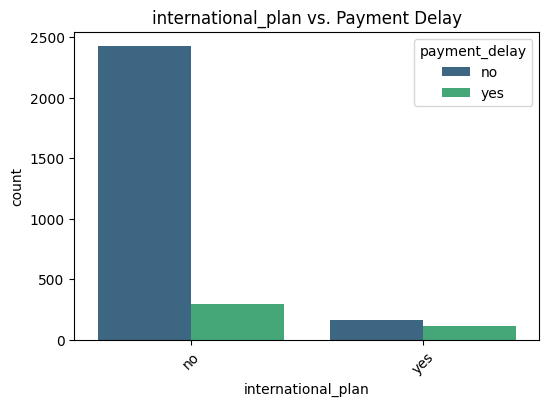

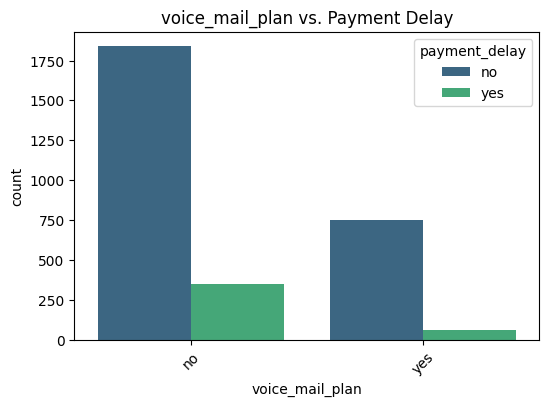

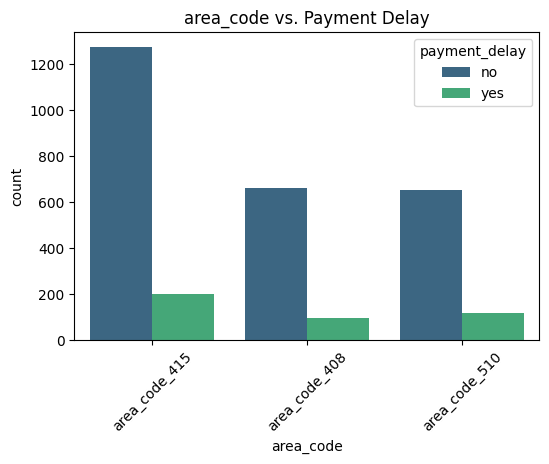

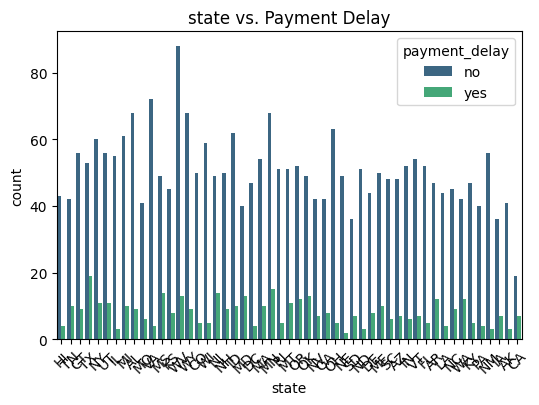

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['international_plan', 'voice_mail_plan', 'area_code', 'state']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train, x=col, hue='payment_delay', palette='viridis')
    plt.title(f"{col} vs. Payment Delay")
    plt.xticks(rotation=45)
    plt.show()


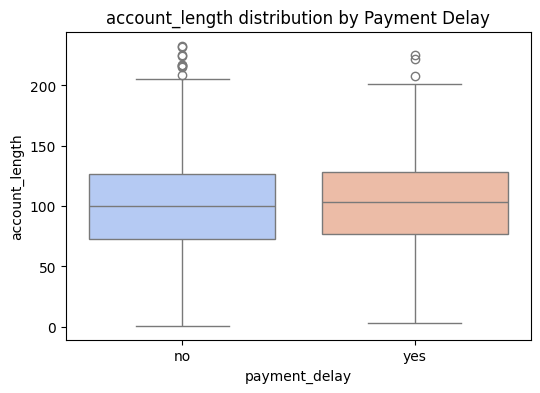

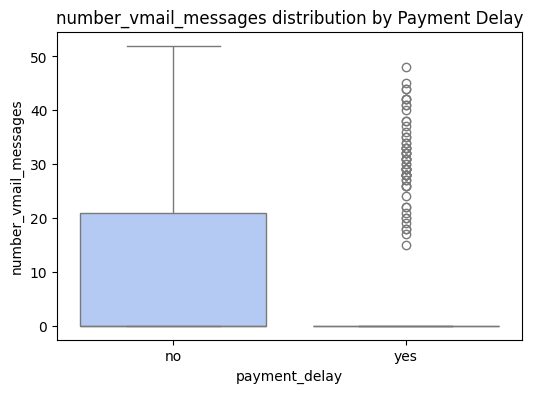

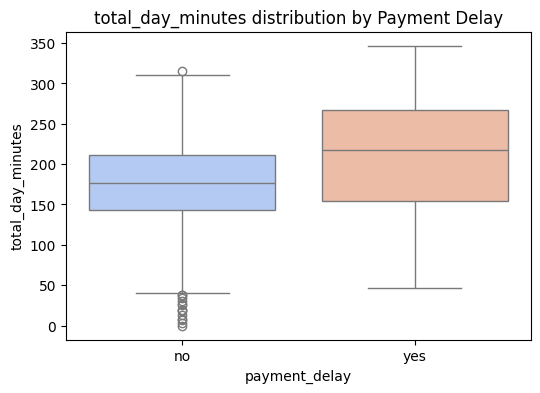

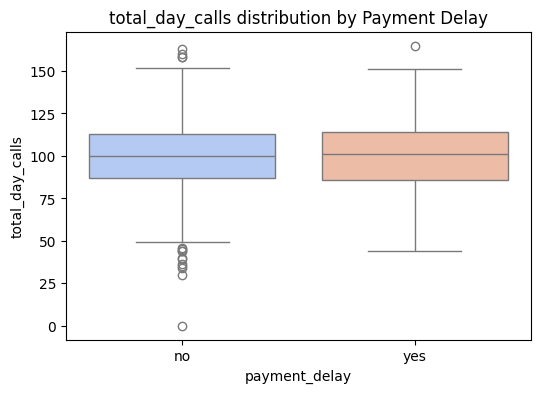

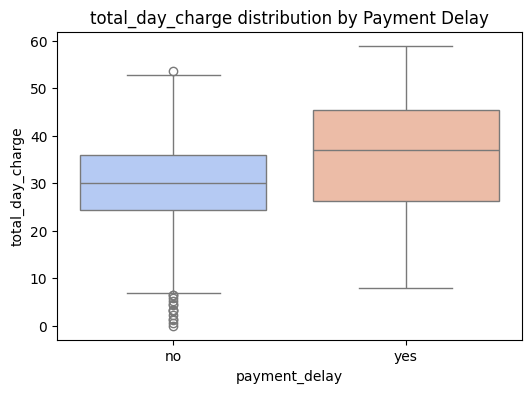

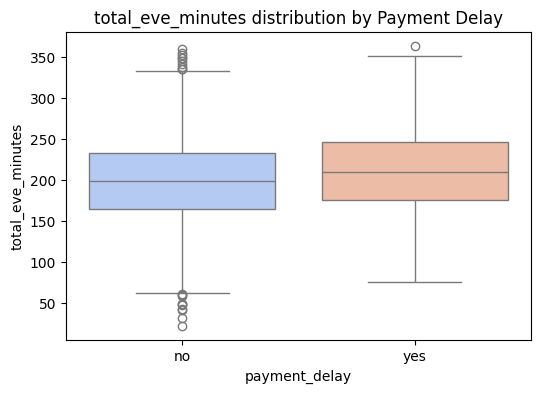

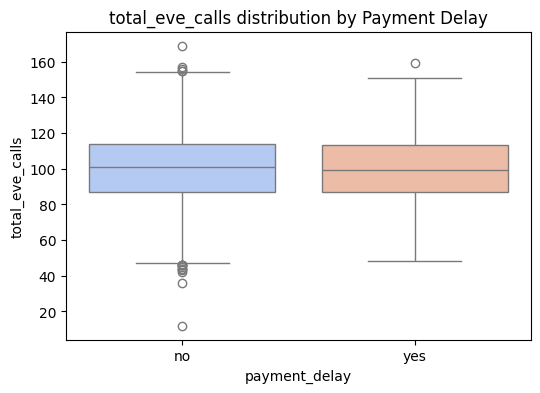

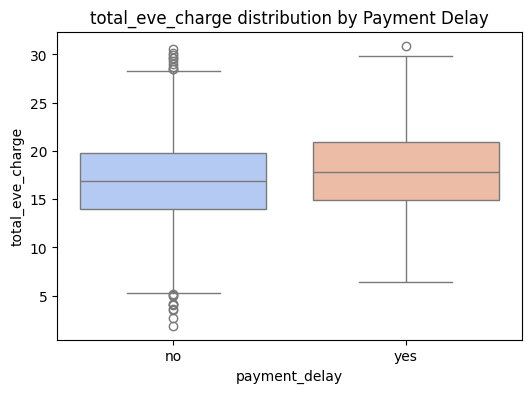

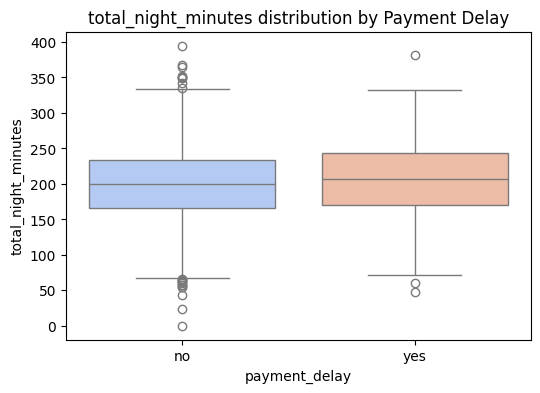

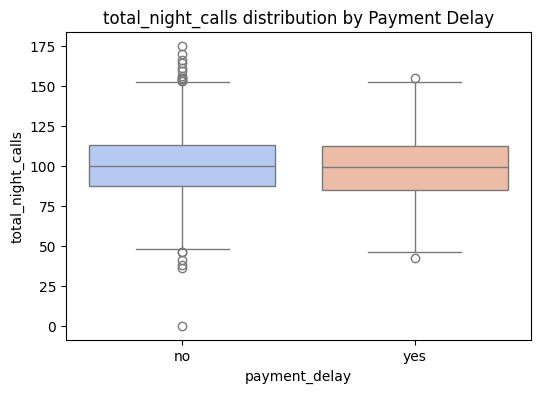

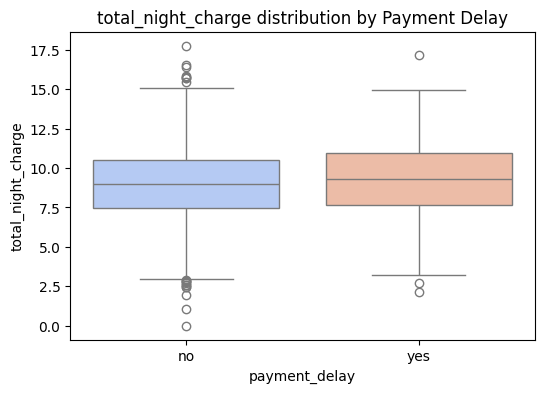

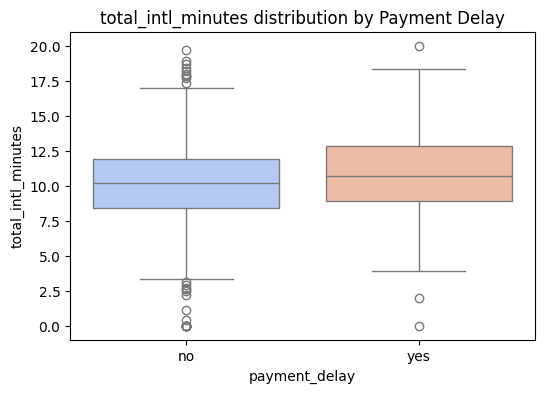

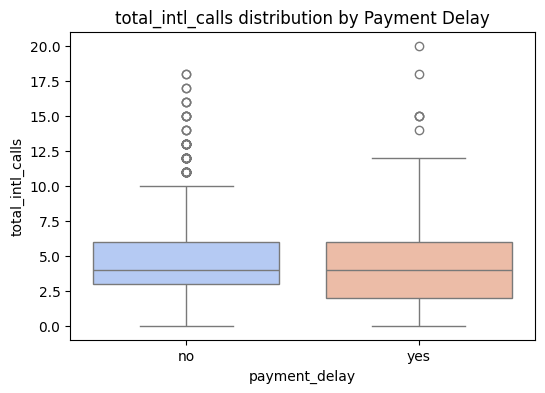

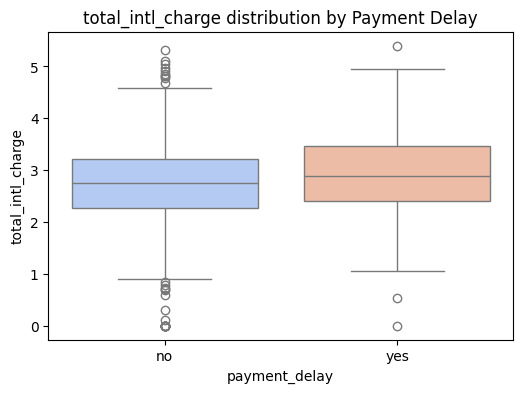

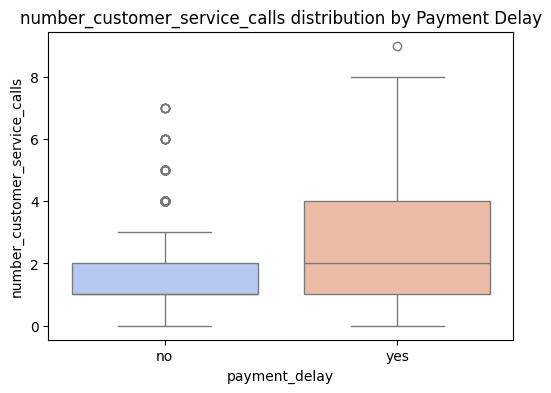

In [ ]:
numeric_cols = train.drop(['payment_delay'], axis=1).select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train, x='payment_delay', y=col, palette='coolwarm')
    plt.title(f"{col} distribution by Payment Delay")
    plt.show()

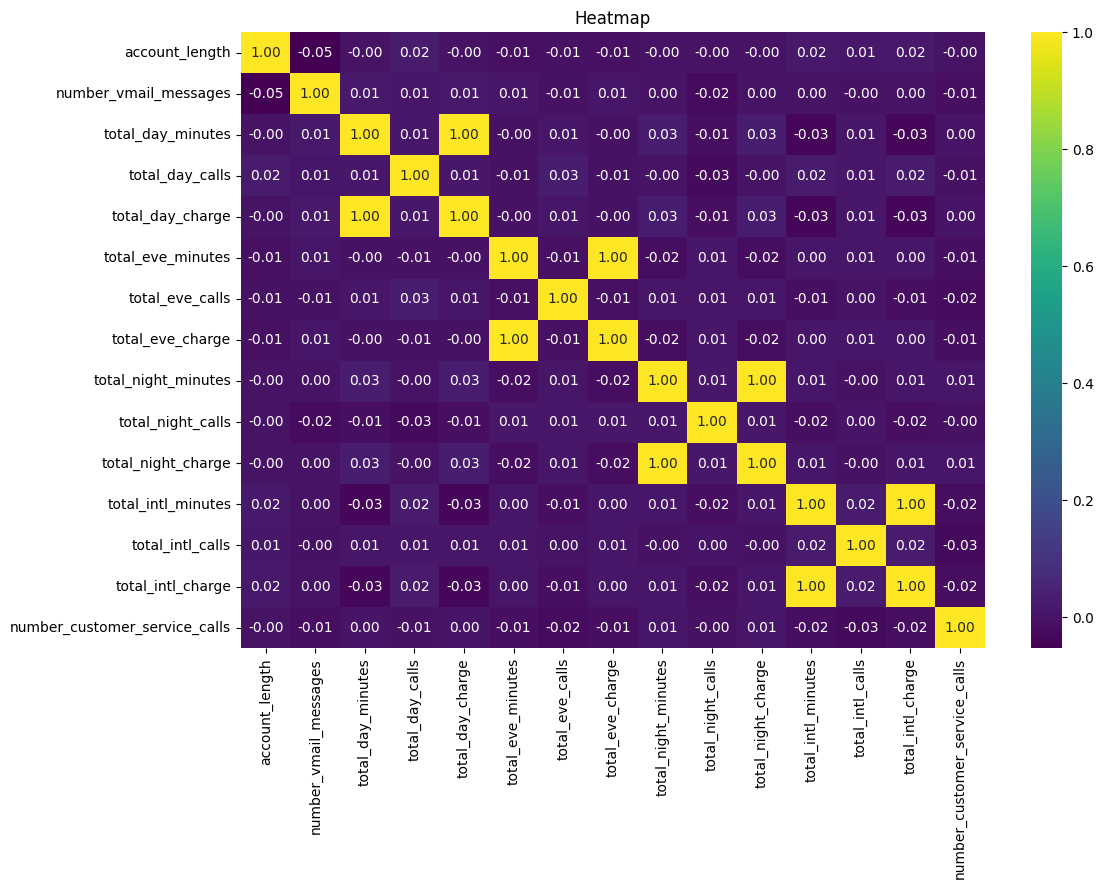

In [ ]:
plt.figure(figsize=(12,8))
corr = train.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap")
plt.show()

###Preprocesare

In [ ]:
train.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,total_minutes,total_charge,total_calls
0,11,33,0,200.5,117,34.09,159.9,111,13.59,196.2,...,True,False,True,False,False,True,False,556.6,56.51,312
1,42,80,0,276.5,122,47.01,195.6,79,16.63,210.3,...,False,True,True,False,False,True,False,682.4,73.10,279
2,6,37,0,134.9,98,22.93,248.4,130,21.11,236.2,...,True,False,True,False,True,False,False,619.5,54.67,341
3,42,106,0,119.2,142,20.26,228.4,139,19.41,197.9,...,True,False,True,False,False,True,False,545.5,48.58,342
4,43,123,0,260.9,85,44.35,168.5,103,14.32,178.3,...,True,False,True,False,True,False,False,607.7,66.69,279


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['state']=le.fit_transform(train['state'])

In [ ]:
train=pd.get_dummies(train, columns=['international_plan', 'voice_mail_plan', 'area_code'])

In [ ]:
train['payment_delay']=train['payment_delay'].map({'yes':1, 'no':0})

In [ ]:
#feature engineering
train['total_minutes']=train['total_day_minutes']+train['total_eve_minutes']+train['total_night_minutes']
train['total_charge']=train['total_day_charge']+train['total_eve_charge']+train['total_night_charge']
train['total_calls']=train['total_day_calls']+train['total_eve_calls']+train['total_night_calls']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
def metrics(y_test, y_pred):
  print('Accuracy score: ', accuracy_score(y_test, y_pred))
  print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('ROC AUC score: ', roc_auc_score(y_test, y_pred))

array([[<Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>],
       [<Axes: title={'center': 'total_intl_calls'}>, <Axes: >]],
      dtype=object)

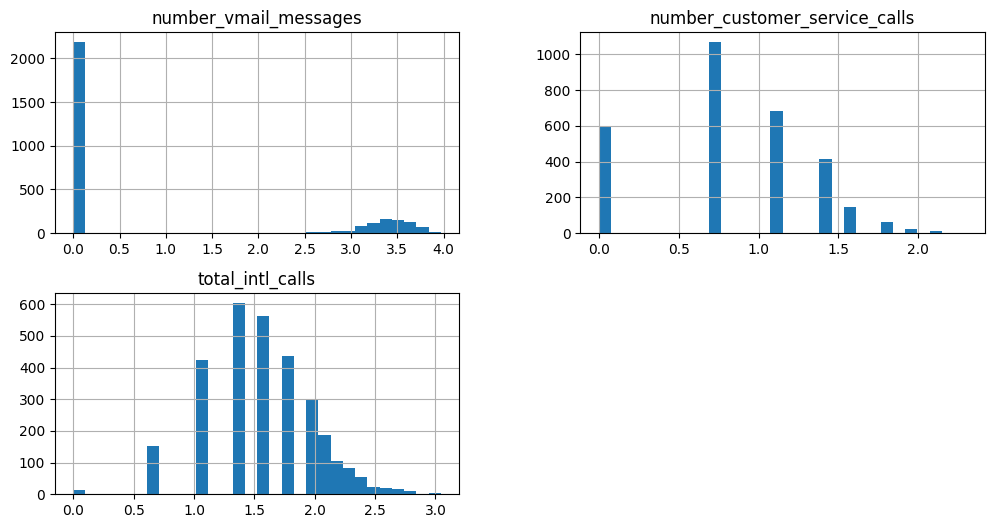

In [ ]:


cols_to_log = ['number_vmail_messages', 'number_customer_service_calls',
               'total_intl_calls']

train_log = train.copy()
for col in cols_to_log:
    train_log[col] = np.log1p(train_log[col])

train_log[cols_to_log].hist(bins=30, figsize=(12, 6))


In [ ]:
train['payment_delay'].value_counts()

,count
payment_delay,
0,2587
1,413


###Fara scalare

In [ ]:
X=train.drop('payment_delay', axis=1)
y=train['payment_delay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.8666666666666667
Confusion matrix: 
 [[514   9]
 [ 71   6]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       523
           1       0.40      0.08      0.13        77

    accuracy                           0.87       600
   macro avg       0.64      0.53      0.53       600
weighted avg       0.82      0.87      0.83       600

ROC AUC score:  0.530356832460083


In [ ]:
params_LR={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
LR2=LogisticRegression()
LR2_tuned=GridSearchCV(estimator=LR2,param_grid=params_LR,cv=5)
LR2_tuned.fit(X_train,y_train)
LR2_tuned.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
lr_tuned=LogisticRegression(**LR2_tuned.best_params_)
lr_tuned.fit(X_train, y_train)
y_pred=lr_tuned.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.8616666666666667
Confusion matrix: 
 [[505  18]
 [ 65  12]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       523
           1       0.40      0.16      0.22        77

    accuracy                           0.86       600
   macro avg       0.64      0.56      0.57       600
weighted avg       0.82      0.86      0.83       600

ROC AUC score:  0.5607136649201658


###KNN

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.8866666666666667
Confusion matrix: 
 [[509  14]
 [ 54  23]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       523
           1       0.62      0.30      0.40        77

    accuracy                           0.89       600
   macro avg       0.76      0.64      0.67       600
weighted avg       0.87      0.89      0.87       600

ROC AUC score:  0.63596632812694


In [ ]:
knn2=KNeighborsClassifier()
param_knn={
    'n_neighbors':np.arange(1,50)}
knn_tuned=GridSearchCV(estimator=knn2,param_grid=param_knn,cv=5)
knn_tuned.fit(X_train,y_train)
knn_tuned.best_params_

{'n_neighbors': np.int64(11)}

In [ ]:
knn_tuned_true=KNeighborsClassifier(**knn_tuned.best_params_)
knn_tuned_true.fit(X_train, y_train)
y_pred=knn_tuned_true.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.8883333333333333
Confusion matrix: 
 [[513  10]
 [ 57  20]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       523
           1       0.67      0.26      0.37        77

    accuracy                           0.89       600
   macro avg       0.78      0.62      0.66       600
weighted avg       0.87      0.89      0.87       600

ROC AUC score:  0.6203099004246232


###SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.8716666666666667
Confusion matrix: 
 [[523   0]
 [ 77   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       523
           1       0.00      0.00      0.00        77

    accuracy                           0.87       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.76      0.87      0.81       600

ROC AUC score:  0.5


In [ ]:
param_svm={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [ ]:
svm2=SVC()
svm_tuned=GridSearchCV(estimator=svm2,param_grid=param_svm,cv=5)
svm_tuned.fit(X_train,y_train)
svm_tuned.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
svm_tuned_true=SVC(**svm_tuned.best_params_)
svm_tuned_true.fit(X_train, y_train)
y_pred=svm_tuned_true.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.9033333333333333
Confusion matrix: 
 [[516   7]
 [ 51  26]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       523
           1       0.79      0.34      0.47        77

    accuracy                           0.90       600
   macro avg       0.85      0.66      0.71       600
weighted avg       0.89      0.90      0.89       600

ROC AUC score:  0.6621390082193142


###DecisionalTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.9483333333333334
Confusion matrix: 
 [[508  15]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       523
           1       0.80      0.79      0.80        77

    accuracy                           0.95       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.95      0.95      0.95       600

ROC AUC score:  0.881763551935636


In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    "max_depth": [3, 5, 7, 9, 10, 15, 20],
    "min_samples_split": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    "min_samples_leaf": [1,  3,  5, 7,  9 ],
    "max_features": [ 'sqrt', 'log2']
}

In [ ]:
dt2=DecisionTreeClassifier()
dt_tuned=GridSearchCV(estimator=dt2,param_grid=params,cv=5)
dt_tuned.fit(X_train,y_train)
dt_tuned.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 18}

In [ ]:
dt_tuned_true=DecisionTreeClassifier(**dt_tuned.best_params_)
dt_tuned_true.fit(X_train, y_train)
y_pred=dt_tuned_true.predict(X_test)
metrics(y_test, y_pred)


Accuracy score:  0.9266666666666666
Confusion matrix: 
 [[512  11]
 [ 33  44]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       523
           1       0.80      0.57      0.67        77

    accuracy                           0.93       600
   macro avg       0.87      0.78      0.81       600
weighted avg       0.92      0.93      0.92       600

ROC AUC score:  0.7751980333242283


###Random Forest(pana acum cel mai bun)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.9733333333333334
Confusion matrix: 
 [[523   0]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.79      0.88        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8961038961038961


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
rf2=RandomForestClassifier()
rf_tuned=GridSearchCV(estimator=rf2,param_grid=param_grid_rf,cv=5)
rf_tuned.fit(X_train,y_train)
rf_tuned.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
rf_tuned_true=RandomForestClassifier(**rf_tuned.best_params_)
rf_tuned_true.fit(X_train, y_train)
y_pred=rf_tuned_true.predict(X_test)
metrics(y_test, y_pred)


Accuracy score:  0.9716666666666667
Confusion matrix: 
 [[523   0]
 [ 17  60]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.78      0.88        77

    accuracy                           0.97       600
   macro avg       0.98      0.89      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8896103896103896


###Extra tree

In [ ]:
from sklearn.tree import ExtraTreeClassifier
xtr=ExtraTreeClassifier()
xtr.fit(X_train, y_train)
y_pred=xtr.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.89
Confusion matrix: 
 [[487  36]
 [ 30  47]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       523
           1       0.57      0.61      0.59        77

    accuracy                           0.89       600
   macro avg       0.75      0.77      0.76       600
weighted avg       0.89      0.89      0.89       600

ROC AUC score:  0.7707779791909811


In [ ]:
param_grid_xtr = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

In [ ]:
xtr2=ExtraTreeClassifier()
xtr_tuned=GridSearchCV(estimator=xtr2,param_grid=param_grid_xtr,cv=5)
xtr_tuned.fit(X_train,y_train)
xtr_tuned.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
xtr_tuned_true=ExtraTreeClassifier(**xtr_tuned.best_params_)
xtr_tuned_true.fit(X_train, y_train)
y_pred=xtr_tuned_true.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.8883333333333333
Confusion matrix: 
 [[497  26]
 [ 41  36]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       523
           1       0.58      0.47      0.52        77

    accuracy                           0.89       600
   macro avg       0.75      0.71      0.73       600
weighted avg       0.88      0.89      0.88       600

ROC AUC score:  0.7089096372079163


###XGB

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
metrics(y_test, y_pred)

Accuracy score:  0.975
Confusion matrix: 
 [[523   0]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       523
           1       1.00      0.81      0.89        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.94       600
weighted avg       0.98      0.97      0.97       600

ROC AUC score:  0.9025974025974026


In [ ]:
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.1, 0.01],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}


In [ ]:
xgb2=XGBClassifier()
xgb_tuned=GridSearchCV(estimator=xgb2,param_grid=param_grid_xgb,cv=5)
xgb_tuned.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 6],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]})

In [ ]:
xgb_tuned_true=XGBClassifier(**xgb_tuned.best_params_)
xgb_tuned_true.fit(X_train, y_train)
y_pred=xgb_tuned_true.predict(X_test)
metrics(y_test, y_pred)


Accuracy score:  0.975
Confusion matrix: 
 [[523   0]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       523
           1       1.00      0.81      0.89        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.94       600
weighted avg       0.98      0.97      0.97       600

ROC AUC score:  0.9025974025974026


###Lightgbm

In [ ]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred=lgbm.predict(X_test)
metrics(y_test, y_pred)

[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3093
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -> initscore=-1.815290
[LightGBM] [Info] Start training from score -1.815290
Accuracy score:  0.9716666666666667
Confusion matrix: 
 [[522   1]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       0.98      0.79      0.88        77

    accuracy                           0.97       600
   macro avg       0.98      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8951478731593454


In [ ]:
param_grid_lgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [-1, 6],
    'model__learning_rate': [0.1, 0.01],
    'model__num_leaves': [31, 63],
    'model__subsample': [0.8, 1.0]
}


In [ ]:
lgb2=LGBMClassifier()
lgb_tuned=GridSearchCV(estimator=lgb2,param_grid=param_grid_lgb,cv=5)
lgb_tuned.fit(X_train,y_train)
lgb_tuned.best_params_


[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 269, number of negative: 1651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3051
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140104 -

{'model__learning_rate': 0.1,
 'model__max_depth': -1,
 'model__n_estimators': 100,
 'model__num_leaves': 31,
 'model__subsample': 0.8}

In [ ]:
lgb_tuned_true=LGBMClassifier(**lgb_tuned.best_params_)
lgb_tuned_true.fit(X_train, y_train)
y_pred=lgb_tuned_true.predict(X_test)

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3093
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -

In [ ]:
metrics(y_test, y_pred)


Accuracy score:  0.9716666666666667
Confusion matrix: 
 [[522   1]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       0.98      0.79      0.88        77

    accuracy                           0.97       600
   macro avg       0.98      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8951478731593454


###Cu scalare

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

In [ ]:
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

In [ ]:
rf2=RandomForestClassifier()
rf2.fit(X_train_sc, y_train)
y_pred=rf2.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9733333333333334
Confusion matrix: 
 [[523   0]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.79      0.88        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8961038961038961


In [ ]:
lr2=LogisticRegression()
lr2.fit(X_train_sc, y_train)
y_pred=lr2.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.865
Confusion matrix: 
 [[505  18]
 [ 63  14]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       523
           1       0.44      0.18      0.26        77

    accuracy                           0.86       600
   macro avg       0.66      0.57      0.59       600
weighted avg       0.83      0.86      0.84       600

ROC AUC score:  0.5737006779071789


In [ ]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X_rs=rs.fit_transform(X)

In [ ]:
X_train_rs, X_test_rs, y_train, y_test = train_test_split(X_rs, y, test_size=0.2, random_state=42)

In [ ]:
rf2=RandomForestClassifier()
rf2.fit(X_train_sc, y_train)
y_pred=rf2.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9733333333333334
Confusion matrix: 
 [[523   0]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.79      0.88        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8961038961038961


In [ ]:
lr2=LogisticRegression()
lr2.fit(X_train_sc, y_train)
y_pred=lr2.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.865
Confusion matrix: 
 [[505  18]
 [ 63  14]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       523
           1       0.44      0.18      0.26        77

    accuracy                           0.86       600
   macro avg       0.66      0.57      0.59       600
weighted avg       0.83      0.86      0.84       600

ROC AUC score:  0.5737006779071789


In [ ]:
#pare ca standard scaler ar merge putin mai bn

###LR

In [ ]:
lr_sc=LogisticRegression()
lr_sc.fit(X_train_sc, y_train)
y_pred=lr_sc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.865
Confusion matrix: 
 [[505  18]
 [ 63  14]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       523
           1       0.44      0.18      0.26        77

    accuracy                           0.86       600
   macro avg       0.66      0.57      0.59       600
weighted avg       0.83      0.86      0.84       600

ROC AUC score:  0.5737006779071789


In [ ]:
lr2=LogisticRegression()
lr_tuned_sc=GridSearchCV(estimator=lr2,param_grid=params_LR,cv=5)
lr_tuned_sc.fit(X_train_sc,y_train)
lr_tuned_sc.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
lr_tuned_sc_true=LogisticRegression(**lr_tuned_sc.best_params_)
lr_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=lr_tuned_sc_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.8616666666666667
Confusion matrix: 
 [[496  27]
 [ 56  21]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       523
           1       0.44      0.27      0.34        77

    accuracy                           0.86       600
   macro avg       0.67      0.61      0.63       600
weighted avg       0.84      0.86      0.85       600

ROC AUC score:  0.6105510168607683


###KNN

In [ ]:
knn_sc=KNeighborsClassifier()
knn_sc.fit(X_train_sc, y_train)
y_pred=knn_sc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.895
Confusion matrix: 
 [[518   5]
 [ 58  19]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       523
           1       0.79      0.25      0.38        77

    accuracy                           0.90       600
   macro avg       0.85      0.62      0.66       600
weighted avg       0.89      0.90      0.87       600

ROC AUC score:  0.61859650865387


In [ ]:
knn2=KNeighborsClassifier()
knn_tuned_sc=GridSearchCV(estimator=knn2,param_grid=param_knn,cv=5)
knn_tuned_sc.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_tuned_sc_true=KNeighborsClassifier(**knn_tuned_sc.best_params_)
knn_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=knn_tuned_sc_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.895
Confusion matrix: 
 [[518   5]
 [ 58  19]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       523
           1       0.79      0.25      0.38        77

    accuracy                           0.90       600
   macro avg       0.85      0.62      0.66       600
weighted avg       0.89      0.90      0.87       600

ROC AUC score:  0.61859650865387


###SVM

In [ ]:
SVM_sc=SVC()
SVM_sc.fit(X_train_sc, y_train)
y_pred=SVM_sc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9233333333333333
Confusion matrix: 
 [[518   5]
 [ 41  36]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       523
           1       0.88      0.47      0.61        77

    accuracy                           0.92       600
   macro avg       0.90      0.73      0.78       600
weighted avg       0.92      0.92      0.91       600

ROC AUC score:  0.7289861190434804


In [ ]:
SVM2=SVC()
SVM_tuned_sc=GridSearchCV(estimator=SVM2,param_grid=param_svm,cv=5)
SVM_tuned_sc.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
svm_tuned_sc_true=SVC(**SVM_tuned_sc.best_params_)
svm_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=svm_tuned_sc_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.925
Confusion matrix: 
 [[514   9]
 [ 36  41]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       523
           1       0.82      0.53      0.65        77

    accuracy                           0.93       600
   macro avg       0.88      0.76      0.80       600
weighted avg       0.92      0.93      0.92       600

ROC AUC score:  0.7576295597328101


###DecisionalTree

In [ ]:
dt_sc=DecisionTreeClassifier()
dt_sc.fit(X_train_sc, y_train)
y_pred=dt_sc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.95
Confusion matrix: 
 [[510  13]
 [ 17  60]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       523
           1       0.82      0.78      0.80        77

    accuracy                           0.95       600
   macro avg       0.89      0.88      0.89       600
weighted avg       0.95      0.95      0.95       600

ROC AUC score:  0.8771820913312309


In [ ]:
dt2=DecisionTreeClassifier()
dt_tuned_sc=GridSearchCV(estimator=dt2,param_grid=params,cv=5)
dt_tuned_sc.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20]})

In [ ]:
dt_tuned_sc_true=DecisionTreeClassifier(**dt_tuned_sc.best_params_)
dt_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=dt_tuned_sc_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9533333333333334
Confusion matrix: 
 [[518   5]
 [ 23  54]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       523
           1       0.92      0.70      0.79        77

    accuracy                           0.95       600
   macro avg       0.94      0.85      0.88       600
weighted avg       0.95      0.95      0.95       600

ROC AUC score:  0.8458692359265974


###Random Forest

In [ ]:
rf_sc=RandomForestClassifier()
rf_sc.fit(X_train_sc, y_train)
y_pred=rf_sc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9733333333333334
Confusion matrix: 
 [[523   0]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.79      0.88        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8961038961038961


In [ ]:
rf2=RandomForestClassifier()
rf_tuned_sc=GridSearchCV(estimator=rf2,param_grid=param_grid_rf,cv=5)
rf_tuned_sc.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [ ]:
rf_tuned_sc_true=RandomForestClassifier(**rf_tuned_sc.best_params_)
rf_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=rf_tuned_sc_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9716666666666667
Confusion matrix: 
 [[523   0]
 [ 17  60]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.78      0.88        77

    accuracy                           0.97       600
   macro avg       0.98      0.89      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8896103896103896


In [ ]:
from sklearn.model_selection import cross_val_score
values=cross_val_score(rf_tuned_sc_true,X_sc,y,scoring='f1',cv=5)
print("Cross-validation scores:", values)
print("Mean cross-validation score:", values.mean())

Cross-validation scores: [0.89932886 0.88590604 0.93670886 0.87837838 0.84768212]
Mean cross-validation score: 0.8896008515344059


###Extra tree

In [ ]:
xtr_sc=ExtraTreeClassifier()
xtr_sc.fit(X_train_sc, y_train)
y_pred=xtr_sc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.8583333333333333
Confusion matrix: 
 [[479  44]
 [ 41  36]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       523
           1       0.45      0.47      0.46        77

    accuracy                           0.86       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.86      0.86      0.86       600

ROC AUC score:  0.6917012242060042


In [ ]:
xtr2=ExtraTreeClassifier()
xtr_tuned_sc=GridSearchCV(estimator=xtr2,param_grid=param_grid_xtr,cv=5)
xtr_tuned_sc.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=ExtraTreeClassifier(),
             param_grid={'max_depth': [None, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [ ]:
xtr_tuned_sc_true=ExtraTreeClassifier(**xtr_tuned_sc.best_params_)
xtr_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=xtr_tuned_sc_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.8833333333333333
Confusion matrix: 
 [[498  25]
 [ 45  32]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       523
           1       0.56      0.42      0.48        77

    accuracy                           0.88       600
   macro avg       0.74      0.68      0.71       600
weighted avg       0.87      0.88      0.88       600

ROC AUC score:  0.6838916341784411


###XGB

In [ ]:
xgb_sc=XGBClassifier()
xgb_sc.fit(X_train_sc, y_train)
y_pred=xgb_sc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.975
Confusion matrix: 
 [[523   0]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       523
           1       1.00      0.81      0.89        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.94       600
weighted avg       0.98      0.97      0.97       600

ROC AUC score:  0.9025974025974026


In [ ]:
xgb2=XGBClassifier()
xgb_tuned_sc=GridSearchCV(estimator=xgb2,param_grid=param_grid_xgb,cv=5)
xgb_tuned_sc.fit(X_train_sc,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 6],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]})

In [ ]:
xgb_tuned_sc_true=XGBClassifier(**xgb_tuned_sc.best_params_)
xgb_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=xgb_tuned_sc_true.predict(X_test_sc)
metrics(y_test,y_pred)

Accuracy score:  0.975
Confusion matrix: 
 [[523   0]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       523
           1       1.00      0.81      0.89        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.94       600
weighted avg       0.98      0.97      0.97       600

ROC AUC score:  0.9025974025974026


In [ ]:
values=cross_val_score(xgb_tuned_sc_true,X_sc,y,scoring='f1',cv=5)
print("Cross-validation scores:", values)
print("Mean cross-validation score:", values.mean())

Cross-validation scores: [0.91390728 0.88       0.92405063 0.86842105 0.84768212]
Mean cross-validation score: 0.8868122179032962


###Lightgbm

In [ ]:
lgbm_sc=LGBMClassifier()
lgbm_sc.fit(X_train_sc, y_train)
y_pred=lgbm_sc.predict(X_test_sc)
metrics(y_test, y_pred)

[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3107
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -> initscore=-1.815290
[LightGBM] [Info] Start training from score -1.815290
Accuracy score:  0.9716666666666667
Confusion matrix: 
 [[523   0]
 [ 17  60]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.78      0.88        77

    accuracy                           0.97       600
   macro avg       0.98      0.89      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8896103896103896


In [ ]:
lgbm2=LGBMClassifier()
lgb_tuned_sc=GridSearchCV(estimator=lgbm2,param_grid=param_grid_lgb,cv=5)
lgb_tuned_sc.fit(X_train_sc,y_train)

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 269, number of negative: 1651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140104 -

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [-1, 6],
                         'model__n_estimators': [100, 200],
                         'model__num_leaves': [31, 63],
                         'model__subsample': [0.8, 1.0]})

In [ ]:
lgb_tuned_sc_true=LGBMClassifier(**lgb_tuned_sc.best_params_)
lgb_tuned_sc_true.fit(X_train_sc, y_train)
y_pred=lgb_tuned_sc_true.predict(X_test_sc)
metrics(y_test, y_pred)

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3107
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -

In [ ]:
values=cross_val_score(lgb_tuned_sc_true,X_sc,y,scoring='f1',cv=5)
print("Cross-validation scores:", values)
print("Mean cross-validation score:", values.mean())

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 331, number of negative: 2069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3110
[LightGBM] [Info] Number of data points in the train set: 2400, number of used feature

In [ ]:
#cele mai bune modele: RandomForest, XGB, LGB

###Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X_train_sc,y_train)

###RandomForest

In [ ]:
rf_smote=RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)
y_pred=rf_smote.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9683333333333334
Confusion matrix: 
 [[518   5]
 [ 14  63]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       523
           1       0.93      0.82      0.87        77

    accuracy                           0.97       600
   macro avg       0.95      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.9043107943681559


In [ ]:
rf2=RandomForestClassifier()
rf_tuned_smote=GridSearchCV(estimator=rf2,param_grid=param_grid_rf,cv=5)
rf_tuned_smote.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [ ]:
rf_tuned_smote_true=RandomForestClassifier(**rf_tuned_smote.best_params_)
rf_tuned_smote_true.fit(X_train_smote, y_train_smote)
y_pred=rf_tuned_smote_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9716666666666667
Confusion matrix: 
 [[521   2]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       0.97      0.81      0.88        77

    accuracy                           0.97       600
   macro avg       0.97      0.90      0.93       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.9006853567083013


In [ ]:
values=cross_val_score(rf_tuned_smote_true,X_sc,y,scoring='f1',cv=5)
print("Cross-validation scores:", values)
print("Mean cross-validation score:", values.mean())

Cross-validation scores: [0.89932886 0.88590604 0.92993631 0.87837838 0.84768212]
Mean cross-validation score: 0.888246340529004


###XGB

In [ ]:
xgb_smote=XGBClassifier()
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred=xgb_smote.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9733333333333334
Confusion matrix: 
 [[522   1]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       0.98      0.81      0.89        77

    accuracy                           0.97       600
   macro avg       0.98      0.90      0.94       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.901641379652852


In [ ]:
xgb2=XGBClassifier()
xgb_tuned_smote=GridSearchCV(estimator=xgb2,param_grid=param_grid_xgb,cv=5)
xgb_tuned_smote.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 6],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]})

In [ ]:
xgb_tuned_smote_true=XGBClassifier(**xgb_tuned_smote.best_params_)
xgb_tuned_smote_true.fit(X_train_smote, y_train_smote)
y_pred=xgb_tuned_smote_true.predict(X_test_sc)
metrics(y_test, y_pred)


Accuracy score:  0.9733333333333334
Confusion matrix: 
 [[522   1]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       0.98      0.81      0.89        77

    accuracy                           0.97       600
   macro avg       0.98      0.90      0.94       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.901641379652852


In [ ]:
values=cross_val_score(xgb_tuned_smote_true,X_sc,y,scoring='f1',cv=5)
print("Cross-validation scores:", values)
print("Mean cross-validation score:", values.mean())

Cross-validation scores: [0.91390728 0.88       0.92405063 0.86842105 0.84768212]
Mean cross-validation score: 0.8868122179032962


###lgbm

In [ ]:
lgbm_smote=LGBMClassifier()
lgbm_smote.fit(X_train_smote, y_train_smote)
y_pred=lgbm_smote.predict(X_test_sc)
metrics(y_test, y_pred)

[LightGBM] [Info] Number of positive: 2064, number of negative: 2064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5089
[LightGBM] [Info] Number of data points in the train set: 4128, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy score:  0.975
Confusion matrix: 
 [[523   0]
 [ 15  62]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       523
           1       1.00      0.81      0.89        77

    accuracy                           0.97       600
   macro avg       0.99      0.90      0.94       600
weighted avg       0.98      0.97      0.97       600

ROC AUC score:  0.9025974025974026


In [ ]:
lgbm2=LGBMClassifier()
lgb_tuned_smote=GridSearchCV(estimator=lgbm2,param_grid=param_grid_lgb,cv=5)
lgb_tuned_smote.fit(X_train_smote,y_train_smote)

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 1651, number of negative: 1651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5080
[LightGBM] [Info] Number of data points in the train set: 3302, number of used featur

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [-1, 6],
                         'model__n_estimators': [100, 200],
                         'model__num_leaves': [31, 63],
                         'model__subsample': [0.8, 1.0]})

In [ ]:
lgb_tuned_smote_true=LGBMClassifier(**lgb_tuned_smote.best_params_)
lgb_tuned_smote_true.fit(X_train_smote, y_train_smote)
y_pred=lgb_tuned_smote_true.predict(X_test_sc)
metrics(y_test, y_pred)

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 2064, number of negative: 2064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5089
[LightGBM] [Info] Number of data points in the train set: 4128, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 

In [ ]:
values=cross_val_score(lgb_tuned_smote_true,X_sc,y,scoring='f1',cv=5)
print("Cross-validation scores:", values)
print("Mean cross-validation score:", values.mean())

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 331, number of negative: 2069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3110
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.137917 -

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_smote, y_train_smote)
y_pred = gbc.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9666666666666667
Confusion matrix: 
 [[519   4]
 [ 16  61]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       523
           1       0.94      0.79      0.86        77

    accuracy                           0.97       600
   macro avg       0.95      0.89      0.92       600
weighted avg       0.97      0.97      0.97       600

ROC AUC score:  0.8922798043256933


###Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler()
X_train_rus,y_train_rus=rus.fit_resample(X_train_sc,y_train)

###XGB

In [ ]:
xgb_rus=XGBClassifier()
xgb_rus.fit(X_train_rus, y_train_rus)
y_pred=xgb_rus.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9283333333333333
Confusion matrix: 
 [[492  31]
 [ 12  65]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       523
           1       0.68      0.84      0.75        77

    accuracy                           0.93       600
   macro avg       0.83      0.89      0.85       600
weighted avg       0.94      0.93      0.93       600

ROC AUC score:  0.8924412107968513


In [ ]:
xgb2=XGBClassifier()
xgb_tuned_rus=GridSearchCV(estimator=xgb2,param_grid=param_grid_xgb,cv=5)
xgb_tuned_rus.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 6],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]})

In [ ]:
xgb_tuned_rus_true=XGBClassifier(**xgb_tuned_rus.best_params_)
xgb_tuned_rus_true.fit(X_train_rus, y_train_rus)
y_pred=xgb_tuned_rus_true.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.9283333333333333
Confusion matrix: 
 [[492  31]
 [ 12  65]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       523
           1       0.68      0.84      0.75        77

    accuracy                           0.93       600
   macro avg       0.83      0.89      0.85       600
weighted avg       0.94      0.93      0.93       600

ROC AUC score:  0.8924412107968513


###LGBM

In [ ]:
lgb_rus=LGBMClassifier()
lgb_rus.fit(X_train_rus, y_train_rus)
y_pred=lgb_rus.predict(X_test_sc)
metrics(y_test, y_pred)

[LightGBM] [Info] Number of positive: 336, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2606
[LightGBM] [Info] Number of data points in the train set: 672, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [ ]:
lgb2=LGBMClassifier()
lgb_tuned_rus=GridSearchCV(estimator=lgb2,param_grid=param_grid_lgb,cv=5)
lgb_tuned_rus.fit(X_train_rus,y_train_rus)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 269, number of negative: 268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [-1, 6],
                         'model__n_estimators': [100, 200],
                         'model__num_leaves': [31, 63],
                         'model__subsample': [0.8, 1.0]})

In [ ]:
lgb_tuned_rus_true=LGBMClassifier(**lgb_tuned_rus.best_params_)
lgb_tuned_rus_true.fit(X_train_rus, y_train_rus)
y_pred=lgb_tuned_rus_true.predict(X_test_sc)
metrics(y_test, y_pred)


[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 336, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2606
[LightGBM] [Info] Number of data points in the train set: 672, number of used features:

Random forest

In [ ]:
rf_rus=RandomForestClassifier()
rf_rus.fit(X_train_rus, y_train_rus)
y_pred=rf_rus.predict(X_test_sc)
metrics(y_test, y_pred)

Accuracy score:  0.895
Confusion matrix: 
 [[474  49]
 [ 14  63]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       523
           1       0.56      0.82      0.67        77

    accuracy                           0.90       600
   macro avg       0.77      0.86      0.80       600
weighted avg       0.92      0.90      0.90       600

ROC AUC score:  0.8622457848079264


In [ ]:
#undersampling slab

###Predictie

In [ ]:
test=pd.read_excel('test_cursanti.xlsx')

In [ ]:
test.shape

(202, 26)

In [ ]:
test.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,total_minutes,total_charge,total_calls
0,22,102,0,242.2,88,41.17,233.2,89,19.82,188.5,...,True,False,True,False,False,False,True,663.9,69.47,298
1,45,139,23,157.6,129,26.79,247.0,96,21.00,259.2,...,True,False,False,True,False,False,True,663.8,59.45,337
2,43,128,40,171.2,88,29.10,145.7,109,12.38,196.8,...,True,False,False,True,False,True,False,513.7,50.34,290
3,9,79,0,130.2,119,22.13,290.9,121,24.73,194.8,...,True,False,True,False,False,False,True,615.9,55.63,380
4,8,127,0,241.7,115,41.09,141.5,96,12.03,170.7,...,True,False,True,False,False,False,True,553.9,60.80,305


In [ ]:

test['state'] = le.transform(test['state'])

In [ ]:
test=pd.get_dummies(test, columns=['international_plan', 'voice_mail_plan', 'area_code'])

In [ ]:
test['total_minutes']=test['total_day_minutes']+test['total_eve_minutes']+test['total_night_minutes']
test['total_charge']=test['total_day_charge']+test['total_eve_charge']+test['total_night_charge']
test['total_calls']=test['total_day_calls']+test['total_eve_calls']+test['total_night_calls']

In [ ]:
test_scaled=scaler.transform(test)

In [ ]:
y_pred_real=lgb_tuned_smote_true.predict(test_scaled)

[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth


In [ ]:
test_scaled = pd.DataFrame(test_scaled,
                           columns=test.columns,
                           index=test.index)

In [ ]:
predict=pd.read_excel('test_cursanti.xlsx')

In [ ]:
predict['payment_delay']=y_pred_real

In [ ]:
predict.head(15)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay
0,MI,102,area_code_510,no,no,0,242.2,88,41.17,233.2,89,19.82,188.5,121,8.48,6.2,6,1.67,3,0
1,VA,139,area_code_510,no,yes,23,157.6,129,26.79,247.0,96,21.00,259.2,112,11.66,13.7,2,3.70,0,0
2,TX,128,area_code_415,no,yes,40,171.2,88,29.10,145.7,109,12.38,196.8,93,8.86,14.0,6,3.78,1,0
3,FL,79,area_code_510,no,no,0,130.2,119,22.13,290.9,121,24.73,194.8,140,8.77,14.0,6,3.78,3,0
4,DE,127,area_code_510,no,no,0,241.7,115,41.09,141.5,96,12.03,170.7,94,7.68,4.5,5,1.22,2,0
5,WV,107,area_code_415,no,no,0,123.1,100,20.93,158.4,82,13.46,256.1,82,11.52,9.3,5,2.51,0,0
6,KY,96,area_code_415,no,yes,40,108.6,90,18.46,206.4,154,17.54,126.3,118,5.68,13.4,4,3.62,0,0
7,WV,121,area_code_415,no,no,0,103.3,110,17.56,129.1,82,10.97,167.1,113,7.52,10.7,3,2.89,0,0
8,AZ,76,area_code_408,no,yes,12,98.4,100,16.73,187.5,119,15.94,177.0,68,7.97,15.1,3,4.08,1,0
9,MD,115,area_code_408,no,no,0,254.8,97,43.32,153.5,110,13.05,217.6,117,9.79,9.0,4,2.43,1,0


In [ ]:
delay=predict[predict['payment_delay']==1]
delay_300=delay.head(300)
delay_300.shape
delay.shape

(28, 20)

In [ ]:
delay_300.to_csv("delay.csv", index=False)

In [ ]:
predict.to_csv('Predict.csv',index=False)